In [1]:
from numpy import matrix, abs, sqrt, linspace, array, pi, sin, cos
from scipy.constants import G
τ = 2*pi

In [2]:
from matplotlib.pyplot import figure, rcParams
from conf_matplotlib import conf_matplotlib_oscuro
conf_matplotlib_oscuro()

In [3]:
from control import NonlinearIOSystem, input_output_response, InterconnectedSystem

\begin{align}
\ddot{x} &= x \dot{\theta}^2 + \frac{GM}{x^2} \\
\ddot{\theta} &= - \frac{2 \dot{x} \dot{\theta}}{x} \\
\end{align}

In [185]:
def sistema_satelital(t, X, u, params):
    M = params.get("masa_tierra", 5.9736e24)
    ΔV = u
    x, θ, ẋ, θ̇ = X
    
    ẍ = x*(θ̇**2) - (G*M)/(x**2)
    θ̈ = - (2*ẋ*θ̇)/x
    
    return [ẋ, θ̇, ẍ, θ̈]

In [186]:
io_satelite = NonlinearIOSystem(sistema_satelital, None,
                                inputs=("ΔV"),
                                outputs=("x", "θ", "ẋ", "θ̇"),
                                states=("x", "θ", "ẋ", "θ̇"),
                                name="satelite")

In [187]:
rₒ = 42164e3
rₑ =  6378e3
vₒ =  3074.6

In [188]:
ωₒ = vₒ/rₒ
Tₒ = 24*60*60
ωₒ, τ/Tₒ

(7.292002656294469e-05, 7.27220521664304e-05)

In [195]:
ts = linspace(0, 2*24*60*60, 1000000)
us = array([0 for t in ts])
inis = [rₒ, 0, 0, ωₒ]

In [196]:
t, X = input_output_response(sys=io_satelite, T=ts, U=us, X0=inis)

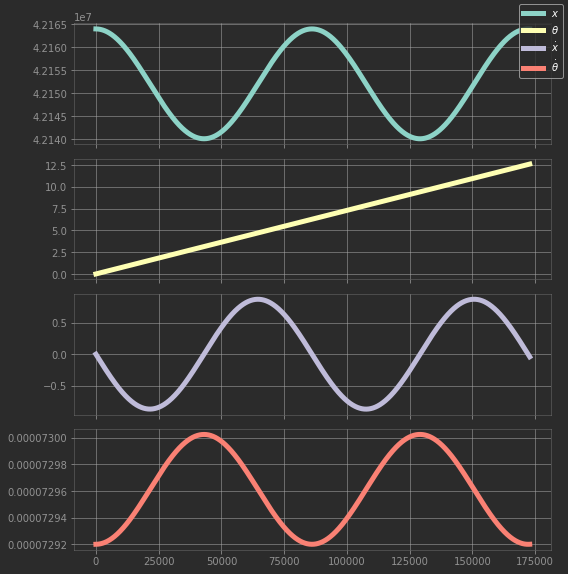

In [197]:
fig = figure(figsize=(8,8))
ax1, ax2, ax3, ax4 = fig.subplots(4, 1, sharex='all',
                                  gridspec_kw={'height_ratios': [1, 1, 1, 1]})
cycle = rcParams['axes.prop_cycle'].by_key()['color']

ax1.plot(t, X[0], c=cycle[0], label=r"$x$")
ax2.plot(t, X[1], c=cycle[1], label=r"$\theta$")
ax3.plot(t, X[2], c=cycle[2], label=r"$\dot{x}$")
ax4.plot(t, X[3], c=cycle[3], label=r"$\dot{\theta}$")

fig.legend()
fig.tight_layout();

In [198]:
x, θ, ẋ, θ̇ = X
px = [a*cos(b) for a, b in zip(*[x, θ])]
py = [a*sin(b) for a, b in zip(*[x, θ])]

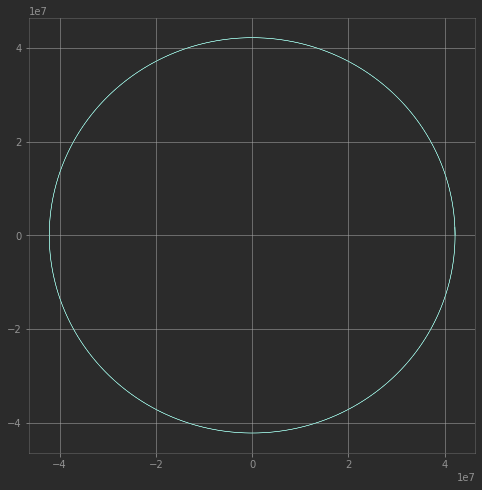

In [199]:
fig = figure(figsize=(8,8))
ax = fig.gca()
ax.plot(px, py, lw=0.5)